In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
pip install PySastrawi

Note: you may need to restart the kernel to use updated packages.


In [4]:
# import StemmerFactory and StopWordRemover
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [5]:
data = pd.read_csv("D:/Taek/PBA/review.csv", encoding='latin1')

In [6]:
data.head(10)

,no,review,kategori
0,1,Barang sampai dengan selamat semoga tidak ada ...,positif
1,2,Puas aja lah meskipun SIM ejector gak ada pen...,cenderung_positif
2,3,mantappppp barang sesuai pesanan,positif
3,4,Barang dan service manteppppp sesuai deskripsi...,positif_kuat
4,5,Paket udah nyampe terimakasih,positif
5,6,Paket udah nyampe terimakasih,positif
6,7,Sy merasa puas belanja di sini barang bagus d...,positif_kuat
7,8,Mantap,positif
8,9,Barang sesuai pesanan kemasan rapih ????,positif
9,10,Mantappppp Fast respon Overall bagus,positif


In [7]:
# extracting the number of examples of each class
positif_kuat_len = data[data['kategori'] == 'positif_kuat'].shape[0]
positif_len = data[data['kategori'] == 'positif'].shape[0]
cenderung_positif_len = data[data['kategori'] == 'cenderung_positif'].shape[0]
negatif_kuat_len = data[data['kategori'] == 'negatif_kuat'].shape[0]
negatif_len = data[data['kategori'] == 'negatif'].shape[0]
cenderung_negatif_len = data[data['kategori'] == 'cenderung_negatif'].shape[0]

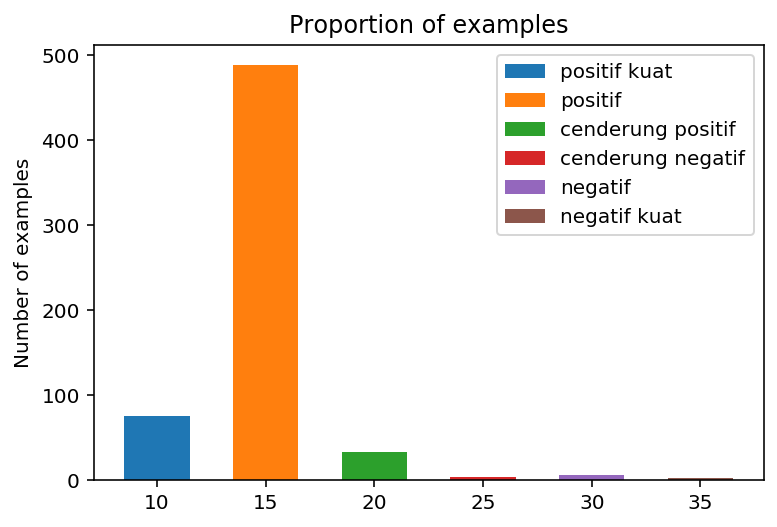

In [8]:
# bar plot of the classes
plt.bar(10,positif_kuat_len,3, label="positif kuat")
plt.bar(15,positif_len,3, label="positif")
plt.bar(20,cenderung_positif_len,3, label="cenderung positif")
plt.bar(25,cenderung_negatif_len,3, label="cenderung negatif")
plt.bar(30,negatif_len,3, label="negatif")
plt.bar(35,negatif_kuat_len,3, label="negatif kuat")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

In [9]:
# remove punctuation
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [10]:
data['review'] = data['review'].apply(remove_punctuation)
data.head(10)

,no,review,kategori
0,1,Barang sampai dengan selamat semoga tidak ada ...,positif
1,2,Puas aja lah meskipun SIM ejector gak ada pen...,cenderung_positif
2,3,mantappppp barang sesuai pesanan,positif
3,4,Barang dan service manteppppp sesuai deskripsi...,positif_kuat
4,5,Paket udah nyampe terimakasih,positif
5,6,Paket udah nyampe terimakasih,positif
6,7,Sy merasa puas belanja di sini barang bagus d...,positif_kuat
7,8,Mantap,positif
8,9,Barang sesuai pesanan kemasan rapih,positif
9,10,Mantappppp Fast respon Overall bagus,positif


In [11]:
# create stopword remover
factory = StopWordRemoverFactory()
sw = factory.get_stop_words()

In [12]:
# create an object of stopword removal
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [13]:
data['review'] = data['review'].apply(stopwords)
data.head(10)

,no,review,kategori
0,1,barang selamat semoga kendala apapun kedepannya,positif
1,2,puas aja sim ejector gak pengiriman cepat,cenderung_positif
2,3,mantappppp barang sesuai pesanan,positif
3,4,barang service manteppppp sesuai deskripsi bin...,positif_kuat
4,5,paket udah nyampe terimakasih,positif
5,6,paket udah nyampe terimakasih,positif
6,7,sy puas belanja barang bagus pengiriman cepat,positif_kuat
7,8,mantap,positif
8,9,barang sesuai pesanan kemasan rapih,positif
9,10,mantappppp fast respon overall bagus,positif


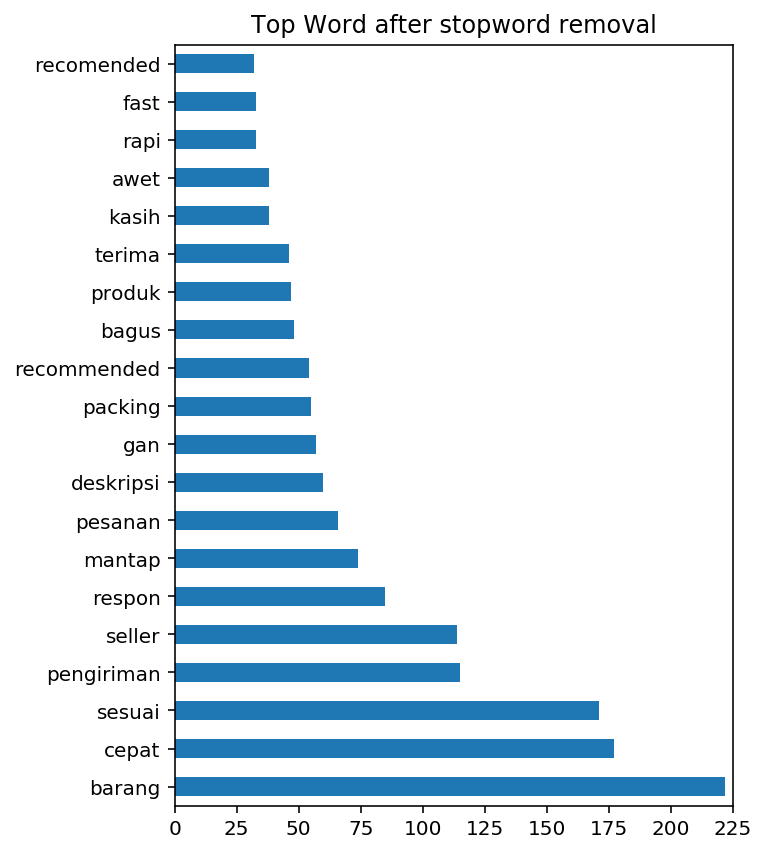

In [17]:
# top words used after stopword removal
freq = pd.Series((' '.join(data['review']).split())).value_counts().sort_values(ascending = False)
top_vocab = freq.head(20)
top_vocab.plot(kind = 'barh', figsize=(5,7), xlim= (0, 225), title = 'Top Word after stopword removal')

In [18]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [19]:
# create an object of stemming function

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [20]:
data['review'] = data['review'].apply(stemming)
data.head(10)

,no,review,kategori
0,1,barang selamat moga kendala apa depan,positif
1,2,puas aja sim ejector gak kirim cepat,cenderung_positif
2,3,mantappppp barang sesuai pesan,positif
3,4,barang service manteppppp sesuai deskripsi bin...,positif_kuat
4,5,paket udah nyampe terimakasih,positif
5,6,paket udah nyampe terimakasih,positif
6,7,sy puas belanja barang bagus kirim cepat,positif_kuat
7,8,mantap,positif
8,9,barang sesuai pesan kemas rapih,positif
9,10,mantappppp fast respon overall bagus,positif


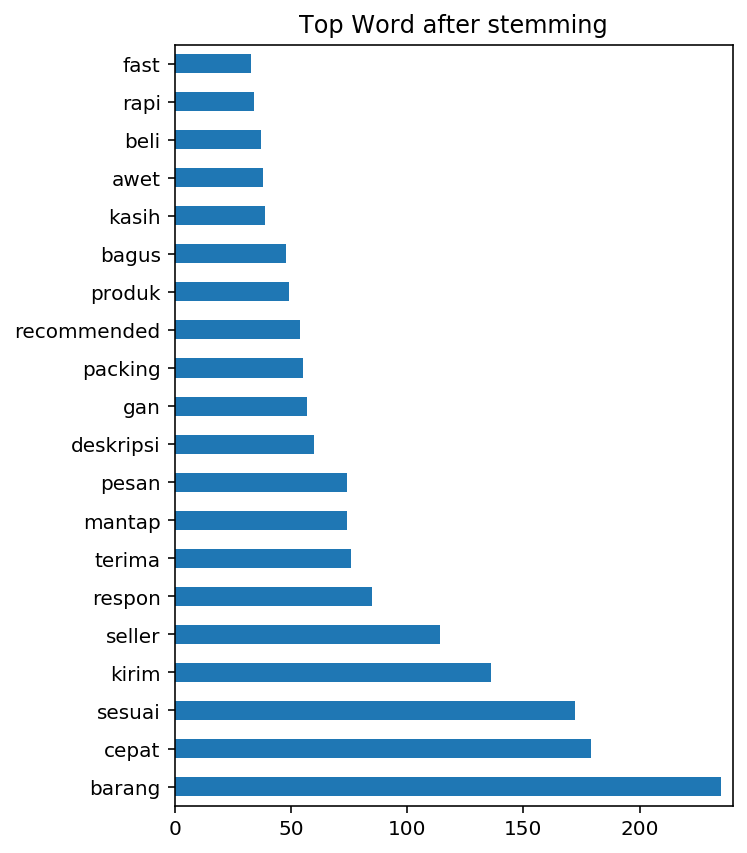

In [26]:
# top words used after stemming
freq = pd.Series((' '.join(data['review']).split())).value_counts().sort_values(ascending = False)
top_vocab = freq.head(20)
top_vocab.plot(kind = 'barh', figsize=(5,7), xlim= (0, 240), title = 'Top Word after stemming')

In [27]:
# editing some word manually to correct typo and abbreviated word

In [49]:
# import edited data
data1 = pd.read_csv("D:/Taek/PBA/review_after_stem_man.csv")

In [50]:
# create stopword remover (repeat)
factory = StopWordRemoverFactory()
sw = factory.get_stop_words()

In [51]:
# create an object of stopword removal (repeat)
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [52]:
data1['review'] = data1['review'].apply(stopwords)
data1.head(10)

,no,review,kategori
0,1,barang selamat moga kendala,positif
1,2,puas aja sim ejector kirim cepat,cenderung_positif
2,3,mantap barang sesuai pesan,positif
3,4,barang service mantap sesuai deskripsi bintang,positif_kuat
4,5,paket udah terimakasih,positif
5,6,paket udah terimakasih,positif
6,7,puas belanja barang bagus kirim cepat,positif_kuat
7,8,mantap,positif
8,9,barang sesuai pesan kemas rapi,positif
9,10,mantap fast respon overall bagus,positif


In [53]:
# create stemmer (repeat)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [54]:
# create an object of stemming function (repeat)

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [55]:
data1['review'] = data1['review'].apply(stemming)
data.head(10)

,no,review,kategori
0,1,barang selamat moga kendala apa depan,positif
1,2,puas aja sim ejector gak kirim cepat,cenderung_positif
2,3,mantappppp barang sesuai pesan,positif
3,4,barang service manteppppp sesuai deskripsi bin...,positif_kuat
4,5,paket udah nyampe terimakasih,positif
5,6,paket udah nyampe terimakasih,positif
6,7,sy puas belanja barang bagus kirim cepat,positif_kuat
7,8,mantap,positif
8,9,barang sesuai pesan kemas rapih,positif
9,10,mantappppp fast respon overall bagus,positif


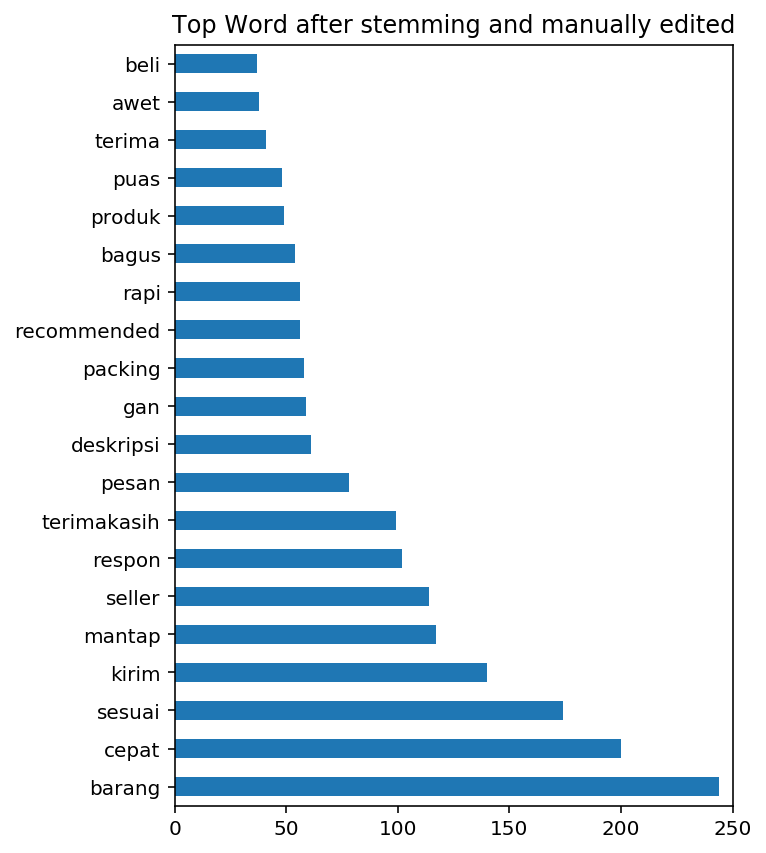

In [56]:
# top words used after stemming and manually edited
freq = pd.Series((' '.join(data1['review']).split())).value_counts().sort_values(ascending = False)
top_vocab = freq.head(20)
top_vocab.plot(kind = 'barh', figsize=(5,7), xlim= (0, 250), title = 'Top Word after stemming and manually edited')

In [57]:
positif_kuat_data = data1[data1['kategori'] == 'positif_kuat']
positif_data = data1[data1['kategori'] == 'positif']
cenderung_positif_data = data1[data1['kategori'] == 'cenderung_positif']
negatif_kuat_data = data1[data1['kategori'] == 'negatif_kuat']
negatif_data = data1[data1['kategori'] == 'negatif']
cenderung_negatif_data = data1[data1['kategori'] == 'cenderung_negatif']

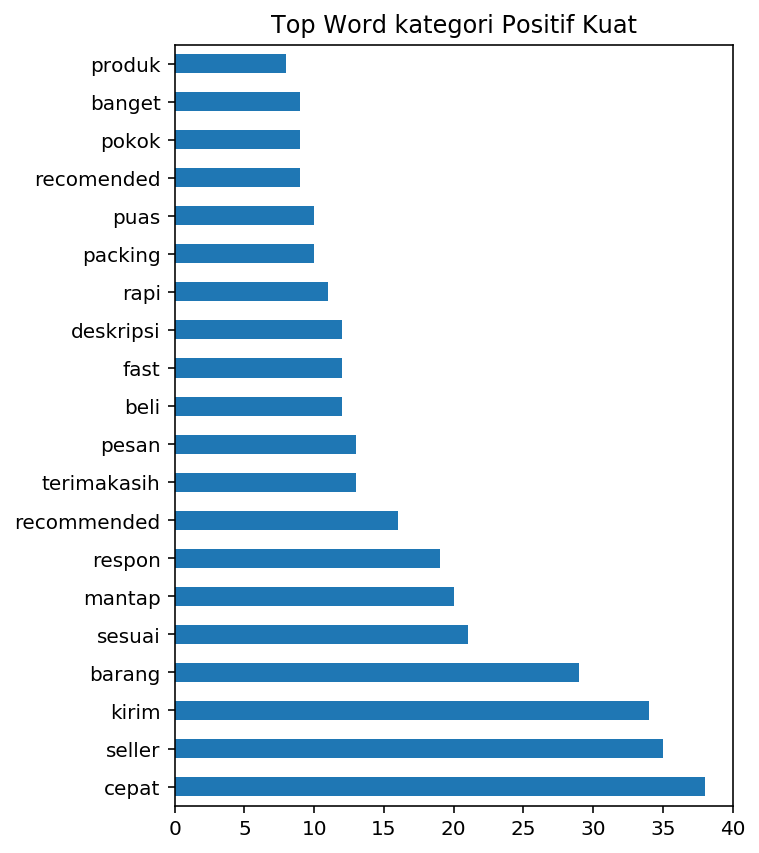

In [58]:
freq = pd.Series((' '.join(positif_kuat_data['review']).split())).value_counts().sort_values(ascending = False)
top_vocab = freq.head(20)
top_vocab.plot(kind = 'barh', figsize=(5,7), xlim= (0, 40), title = 'Top Word kategori Positif Kuat')

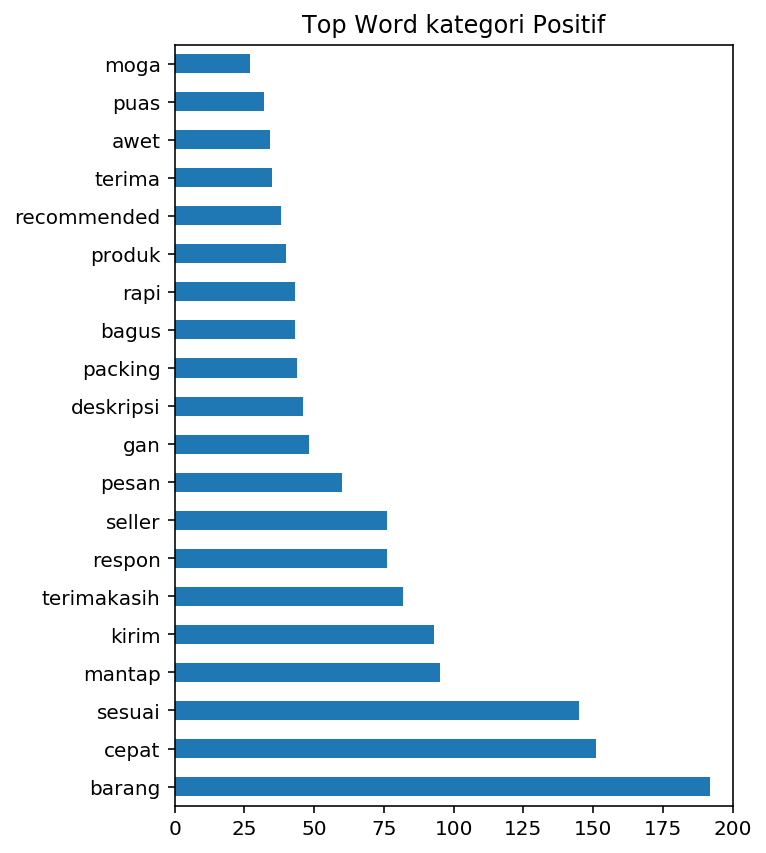

In [59]:
freq = pd.Series((' '.join(positif_data['review']).split())).value_counts().sort_values(ascending = False)
top_vocab = freq.head(20)
top_vocab.plot(kind = 'barh', figsize=(5,7), xlim= (0, 200), title = 'Top Word kategori Positif')

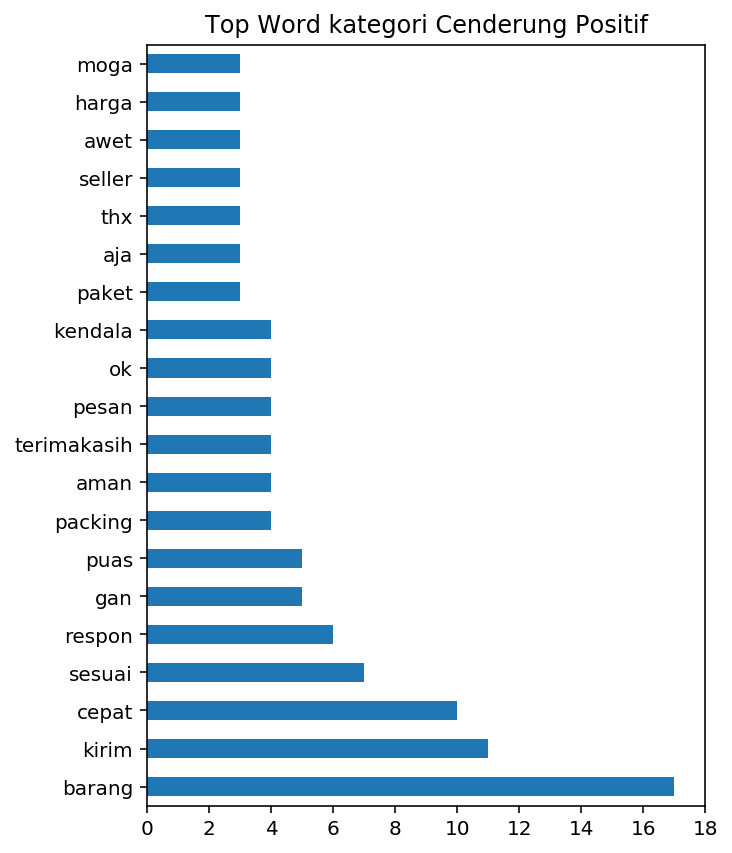

In [60]:
freq = pd.Series((' '.join(cenderung_positif_data['review']).split())).value_counts().sort_values(ascending = False)
top_vocab = freq.head(20)
top_vocab.plot(kind = 'barh', figsize=(5,7), xlim= (0, 18), title = 'Top Word kategori Cenderung Positif')

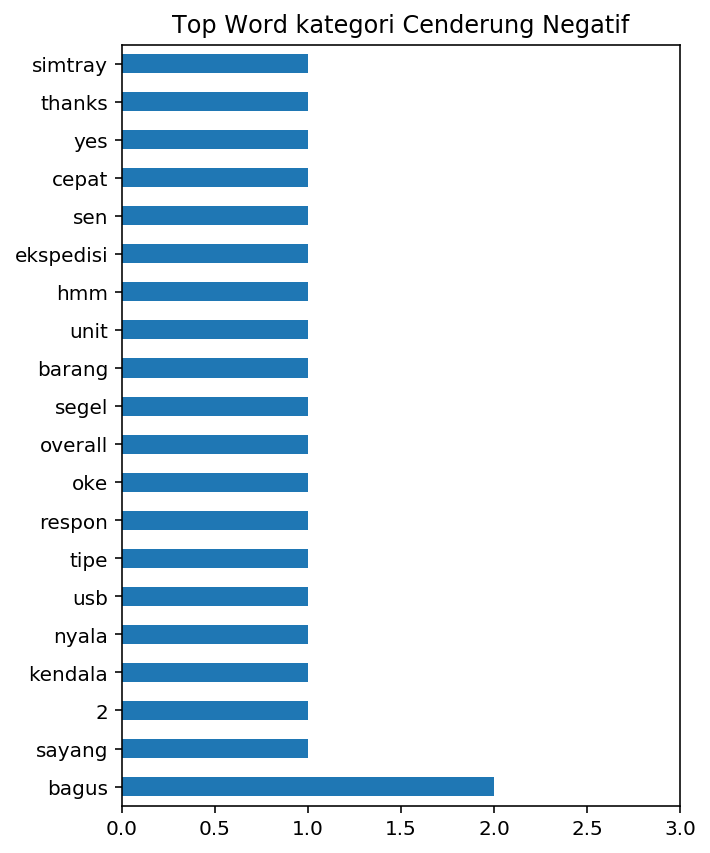

In [62]:
freq = pd.Series((' '.join(cenderung_negatif_data['review']).split())).value_counts().sort_values(ascending = False)
top_vocab = freq.head(20)
top_vocab.plot(kind = 'barh', figsize=(5,7), xlim= (0, 3), title = 'Top Word kategori Cenderung Negatif')

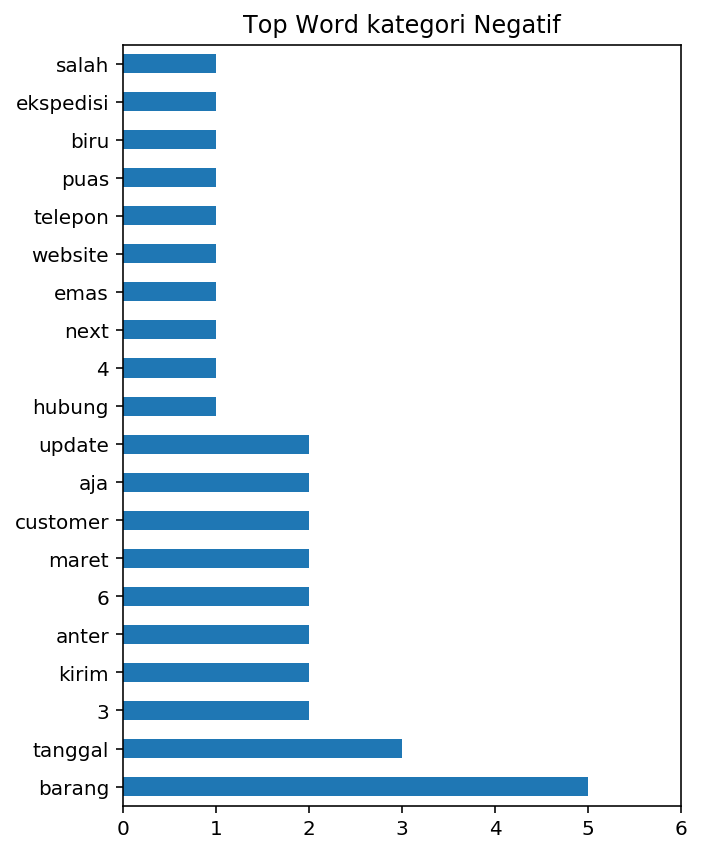

In [63]:
freq = pd.Series((' '.join(negatif_data['review']).split())).value_counts().sort_values(ascending = False)
top_vocab = freq.head(20)
top_vocab.plot(kind = 'barh', figsize=(5,7), xlim= (0, 6), title = 'Top Word kategori Negatif')

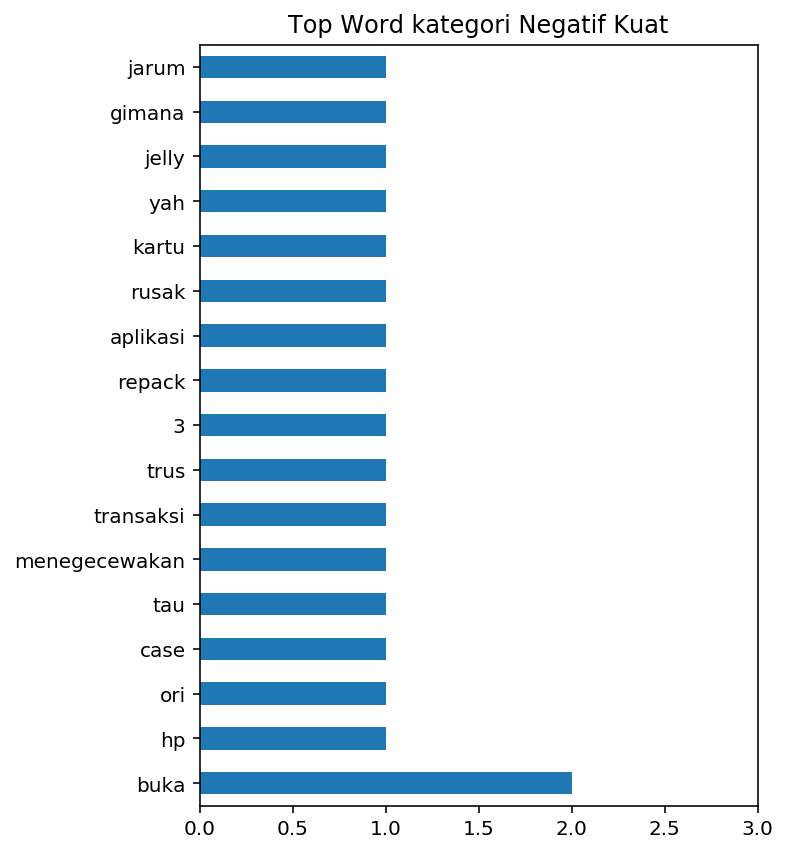

In [67]:
freq = pd.Series((' '.join(negatif_kuat_data['review']).split())).value_counts().sort_values(ascending = False)
top_vocab = freq.head(20)
top_vocab.plot(kind = 'barh', figsize=(5,7), xlim= (0, 3), title = 'Top Word kategori Negatif Kuat')